# Lead Scoring Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

## Importing the Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Import libraries for plot
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set seaborn theme if you prefer
sns.set(style="darkgrid")

In [3]:
# Importing the Leads.csv file
lead_score = pd.read_csv("Leads.csv")
lead_score.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Inspecting the Dataframe and Exploratory Data Analysis

In [4]:
# Let's check the dimensions of the dataframe
lead_score.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
lead_score.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
### Handling Duplicate Rows
# removing duplicate rows
lead_score.drop_duplicates(subset='Lead Number')
lead_score.shape

(9240, 37)

In [7]:
#Handling Null Values
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(lead_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(lead_score.isnull().sum()/lead_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

Total  Percentage
Lead Quality                                    4767       51.59
Asymmetrique Profile Score                      4218       45.65
Asymmetrique Activity Score                     4218       45.65
Asymmetrique Profile Index                      4218       45.65
Asymmetrique Activity Index                     4218       45.65
Tags                                            3353       36.29
What matters most to you in choosing a course   2709       29.32
Lead Profile                                    2709       29.32
What is your current occupation                 2690       29.11
Country                                         2461       26.63
How did you hear about X Education              2207       23.89
Specialization                                  1438       15.56
City                                            1420       15.37
TotalVisits                                      137        1.48
Page Views Per Visit                             137        1.48
Last Activity                                    103        1.11
Lead Source                                       36        0.39
Do Not Email                                       0        0.00
Do Not Call                                        0        0.00
Converted                                          0        0.00
Total Time Spent on Website                        0        0.00
Lead Origin                                        0        0.00
Lead Number                                        0        0.00
Last Notable Activity                              0        0.00
Newspaper Article                                  0        0.00
Search                                             0        0.00
Magazine                                           0        0.00
A free copy of Mastering The Interview             0        0.00
X Education Forums                                 0        0.00
Newspaper                                          0        0.00
Digital Advertisement                              0        0.00
Through Recommendations                            0        0.00
Receive More Updates About Our Courses             0        0.00
Update me on Supply Chain Content                  0        0.00
Get updates on DM Content                          0        0.00
I agree to pay the amount through cheque           0        0.00
Prospect ID                                        0        0.00

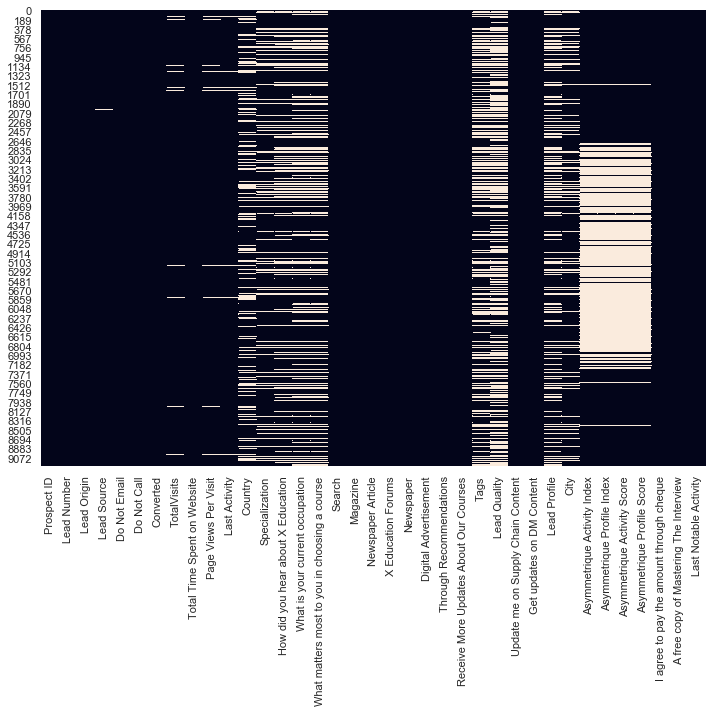

In [8]:
#Visualizing occurence of Null values in the columns based on rows
plt.figure(figsize=(10,10))
sns.heatmap(lead_score.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [9]:
# Identifying if any column exists with only null values
lead_score.isnull().all(axis=0).any()

False

In [10]:
# Dropping all columns with only 0 values
lead_score.loc[:, (lead_score != 0).any(axis=0)]
lead_score.shape

(9240, 37)

In [11]:
#Remove columns which has only one unique value
"""
Deleting the following columns as they have only one unique value and hence cannot be responsible in predicting a successful lead case

Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content

......
"""""
lead_score= lead_score.loc[:,lead_score.nunique()!=1]
lead_score.shape

(9240, 32)

In [12]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
lead_score = lead_score.drop('Asymmetrique Activity Score', axis=1)
lead_score = lead_score.drop('Asymmetrique Profile Score', axis=1)
lead_score.shape

(9240, 30)

In [13]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
lead_score = lead_score.drop('Prospect ID', axis=1)
lead_score.shape

(9240, 29)

In [14]:
# Deleting the columns 'What matters most to you in choosing a course' as it mostly has unique values and some null values.
lead_score = lead_score.drop('What matters most to you in choosing a course', axis=1)
lead_score.shape

(9240, 28)

In [15]:
# Deleting the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
# that contribute to the 'Converted' percentage.
lead_score = lead_score.drop('How did you hear about X Education', axis=1)
lead_score.shape

(9240, 27)

In [16]:
# Let's see the type of each column
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Country                                 6779 non-null   obje

In [17]:
## check all the variables in the data set
lead_score.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

#### Removing rows where a particular column has high missing values

In [18]:
lead_score['Lead Source'].isnull().sum()

36

In [19]:
## checking variation and distribution for catagorical data of 'Lead Origin' variable
lead_score['Lead Origin'].astype('category').value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [20]:
## checking variation and distribution for catagorical data of 'Lead Source' variable
lead_score['Lead Source'].astype('category').value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [21]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
lead_score = lead_score[~pd.isnull(lead_score['Lead Source'])]
lead_score.shape

(9204, 27)

In [22]:
## checking variation and distribution for catagorical data of 'Do Not Email' variable
lead_score['Do Not Email'].astype('category').value_counts()

No     8483
Yes     721
Name: Do Not Email, dtype: int64

In [23]:
## checking variation and distribution for catagorical data of 'Do Not Call' variable
lead_score['Do Not Call'].astype('category').value_counts()

No     9202
Yes       2
Name: Do Not Call, dtype: int64

In [24]:
## checking variation and distribution for catagorical data of 'Last Activity' variable
lead_score['Last Activity'].astype('category').value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [25]:
## checking variation and distribution for catagorical data of 'Country' variable
lead_score['Country'].astype('category').value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
Sweden                     3
Belgium                    2
Bangladesh                 2
China                      2
Ghana                      2
Asia/Pacific Region        2
Italy                      2
Netherlands                2
Philippines                2
Uganda                     2
Indonesia                  1
Kenya                      1
Liberia                    1
Vietnam                    1
Denmark                    1
Russia                     1
Sri Lanka     

In [26]:
## checking variation and distribution for catagorical data of 'Specialization' variable
lead_score['Specialization'].astype('category').value_counts()

Select                               1914
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [27]:
## checking variation and distribution for catagorical data of 'Tags' variable
lead_score['Tags'].astype('category').value_counts()

Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [28]:
## checking variation and distribution for catagorical data of 'Lead Quality' variable
lead_score['Lead Quality'].astype('category').value_counts()

Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [29]:
## checking variation and distribution for catagorical data of 'Lead Profile' variable
lead_score['Lead Profile'].astype('category').value_counts()

Select                         4115
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [30]:
## checking variation and distribution for catagorical data of 'City' variable
lead_score['City'].astype('category').value_counts()

Mumbai                         3220
Select                         2218
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

#### Imputing with Median values because the continuous variables have outliers

In [31]:
lead_score['TotalVisits'].replace(np.NaN, lead_score['TotalVisits'].median(), inplace =True)

In [32]:
lead_score['Page Views Per Visit'].replace(np.NaN, lead_score['Page Views Per Visit'].median(), inplace =True)

#### Imputing with Mode values

In [33]:
lead_score['Country'].mode()

0    India
dtype: object

In [34]:
lead_score.loc[pd.isnull(lead_score['Country']), ['Country']] = 'India'

In [35]:
lead_score['Country'] = lead_score['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
lead_score['Country'].value_counts()

India            8917
Outside India     287
Name: Country, dtype: int64

In [36]:
## Before we start checking null values we need to convert SELECT values into null
# Converting Select to Null values across all columns whereever applicable
lead_score.loc[lead_score['Specialization']=='SELECT',['Specialization']] = np.nan
lead_score.loc[lead_score['Lead Profile']=='SELECT',['Lead Profile']] = np.nan
lead_score.loc[lead_score['City']=='SELECT',['City']] = np.nan
lead_score.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ... Digital Advertisement  \
0                   0.0  Page Visited on Website  ...                    No   
1                   2.5             Email Opened  ...                    No   
2                   2.0             Email Opened  ...                    No   
3                   1.0              Unreachable  ...                    No   
4                   1.0        Converted to Lead  ...                    No   

  Through Recommendations                                 Tags  \
0                      No          Interested in other courses   
1                      No                              Ringing   
2                      No  Will revert after reading the email   
3                      No                              Ringing   
4                      No  Will revert after reading the email   

       Lead Quality    Lead Profile    City Asymmetrique Activity Index  \
0  Low in Relevance          Select  Select                   02.Medium   
1               NaN          Select  Select                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure          Select  Mumbai                   02.Medium   
4          Might be          Select  Mumbai                   02.Medium   

  Asymmetrique Profile Index A free copy of Mastering The Interview  \
0                  02.Medium                                     No   
1                  02.Medium                                     No   
2                    01.High                                    Yes   
3                    01.High                                     No   
4                    01.High                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified  

[5 rows x 27 columns]

In [37]:
## checking total number of nulls available across all variables
lead_score.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Do Not Call                                  0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                              101
Country                                      0
Specialization                            1438
What is your current occupation           2690
Search                                       0
Newspaper Article                            0
X Education Forums                           0
Newspaper                                    0
Digital Advertisement                        0
Through Recommendations                      0
Tags                                      3342
Lead Quality                              4753
Lead Profile 

In [38]:
## evaluating the percenatage of null data across columns
print(round(100*(lead_score.isnull().sum())/len(lead_score.index), 2))

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.10
Country                                    0.00
Specialization                            15.62
What is your current occupation           29.23
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Tags                                      36.31
Lead Quality                            

In [39]:
## also checking the unique values across columns
lead_score.apply(pd.Series.nunique)

Lead Number                               9204
Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1730
Page Views Per Visit                       114
Last Activity                               17
Country                                      2
Specialization                              19
What is your current occupation              6
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Tags                                        26
Lead Quality                                 5
Lead Profile 

In [40]:
## Dropping all the variables that have all the values as same
## These need to be dropped as they don't provide any variations
lead_score = lead_score.loc[:,lead_score.apply(pd.Series.nunique) != 1]
lead_score.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ... Digital Advertisement  \
0                   0.0  Page Visited on Website  ...                    No   
1                   2.5             Email Opened  ...                    No   
2                   2.0             Email Opened  ...                    No   
3                   1.0              Unreachable  ...                    No   
4                   1.0        Converted to Lead  ...                    No   

  Through Recommendations                                 Tags  \
0                      No          Interested in other courses   
1                      No                              Ringing   
2                      No  Will revert after reading the email   
3                      No                              Ringing   
4                      No  Will revert after reading the email   

       Lead Quality    Lead Profile    City Asymmetrique Activity Index  \
0  Low in Relevance          Select  Select                   02.Medium   
1               NaN          Select  Select                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure          Select  Mumbai                   02.Medium   
4          Might be          Select  Mumbai                   02.Medium   

  Asymmetrique Profile Index A free copy of Mastering The Interview  \
0                  02.Medium                                     No   
1                  02.Medium                                     No   
2                    01.High                                    Yes   
3                    01.High                                     No   
4                    01.High                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified  

[5 rows x 27 columns]

In [41]:
## based on the EDA perfomed above the the values the variation acroos the complete data is very less
## only very rare records present different values. Such variables don't add any value almost all the
## values remain constant. e.g. in column "Do Not Call" 9238 values among 9240 have value as "No".
## As such variation is almost zero. Such columns can be dropped.
lead_score = lead_score.drop(['Do Not Call','Newspaper Article',
                            'Search','Digital Advertisement','X Education Forums','Newspaper',
                            'Through Recommendations'], axis=1)
lead_score.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website   India                   Select   
1             Email Opened   India                   Select   
2             Email Opened   India  Business Administration   
3              Unreachable   India    Media and Advertising   
4        Converted to Lead   India                   Select   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality    Lead Profile    City Asymmetrique Activity Index  \
0  Low in Relevance          Select  Select                   02.Medium   
1               NaN          Select  Select                   02.Medium   
2          Might be  Potential Lead  Mumbai                   02.Medium   
3          Not Sure          Select  Mumbai                   02.Medium   
4          Might be          Select  Mumbai                   02.Medium   

  Asymmetrique Profile Index A free copy of Mastering The Interview  \
0                  02.Medium                                     No   
1                  02.Medium                                     No   
2                    01.High                                    Yes   
3                    01.High                                     No   
4                    01.High                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [42]:
#Creating a new category consisting on NULL/Select values for the field Lead Activity
lead_score['Last Activity'].isnull().sum()

101

In [43]:
lead_score['Last Activity'].fillna("Unknown", inplace = True)
lead_score['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [44]:
#Creating a new category consisting on NULL/Select values for the field Lead Profile
lead_score['Lead Profile'].isnull().sum()

2709

In [45]:
lead_score['Lead Profile'].fillna("Unknown", inplace = True)
lead_score['Lead Profile'].value_counts()

Select                         4115
Unknown                        2709
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [46]:
lead_score['Lead Profile'].replace('Select', 'Unknown', inplace =True)
lead_score['Lead Profile'].value_counts()

Unknown                        6824
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [47]:
#Creating a new category consisting on NULL/Select values for the field 'What is your current occupation'
lead_score['What is your current occupation'].isnull().sum()

2690

In [48]:
lead_score['What is your current occupation'].fillna("Unknown", inplace = True)
lead_score['What is your current occupation'].value_counts()

Unemployed              5567
Unknown                 2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [49]:
#Creating a new category consisting on NULL/Select values for the field Specialization
lead_score['Specialization'].isnull().sum()

1438

In [50]:
lead_score['Specialization'].fillna("Unknown", inplace = True)
lead_score['Specialization'].value_counts()

Select                               1914
Unknown                              1438
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [51]:
#Creating a new category consisting on NULL/Select values for the field Tags
lead_score['Tags'].isnull().sum()

3342

In [52]:
lead_score['Tags'].fillna("Unknown", inplace = True)
lead_score['Tags'].value_counts()

Unknown                                              3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [53]:
lead_score['Lead Quality'].isnull().sum()

4753

In [54]:
lead_score['Lead Quality'].fillna("Unknown", inplace = True)
lead_score['Lead Quality'].value_counts()

Unknown              4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [55]:
lead_score['Asymmetrique Profile Index'].isnull().sum()

4201

In [56]:
lead_score['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
lead_score['Asymmetrique Profile Index'].value_counts()

Unknown      4201
02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [57]:
lead_score['Asymmetrique Activity Index'].isnull().sum()

4201

In [58]:
lead_score['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
lead_score['Asymmetrique Activity Index'].value_counts()

Unknown      4201
02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [59]:
lead_score['City'].isnull().sum()

1420

In [60]:
lead_score['City'].fillna("Unknown", inplace = True)
lead_score['City'].value_counts()

Mumbai                         3220
Select                         2218
Unknown                        1420
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [61]:
lead_score['City'].replace('Select', 'Unknown', inplace =True)
lead_score['City'].value_counts()

Unknown                        3638
Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

#### Reinspecting Null Values

In [62]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(lead_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(lead_score.isnull().sum()/lead_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

Total  Percentage
Last Notable Activity                       0         0.0
A free copy of Mastering The Interview      0         0.0
Lead Origin                                 0         0.0
Lead Source                                 0         0.0
Do Not Email                                0         0.0

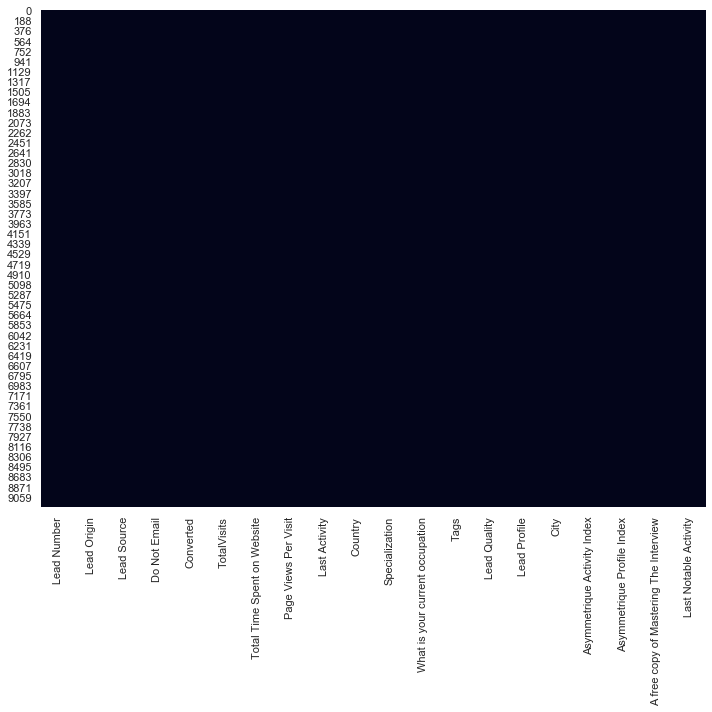

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(lead_score.isnull(), cbar=False)

plt.tight_layout()
plt.show()

### Checking for outliers

In [64]:
lead_score.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

count           mean           std       min  \
Lead Number                  9204.0  617194.608648  23418.830233  579533.0   
Converted                    9204.0       0.383746      0.486324       0.0   
TotalVisits                  9204.0       3.449587      4.824662       0.0   
Total Time Spent on Website  9204.0     489.005541    547.980340       0.0   
Page Views Per Visit         9204.0       2.364923      2.145999       0.0   

                                  25%       50%        75%       90%  \
Lead Number                  596484.5  615479.0  637409.25  650513.1   
Converted                         0.0       0.0       1.00       1.0   
TotalVisits                       1.0       3.0       5.00       7.0   
Total Time Spent on Website      14.0     250.0     938.00    1380.0   
Page Views Per Visit              1.0       2.0       3.00       5.0   

                                   95%        99%       max  
Lead Number                  655405.85  659599.46  660737.0  
Converted                         1.00       1.00       1.0  
TotalVisits                      10.00      17.00     251.0  
Total Time Spent on Website    1562.00    1839.97    2272.0  
Page Views Per Visit              6.00       9.00      55.0

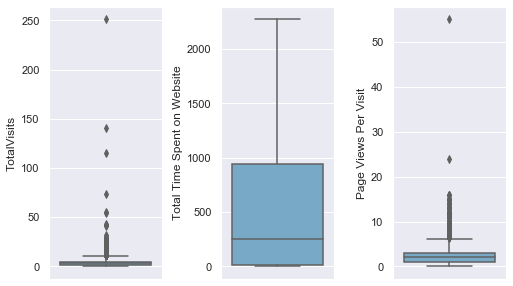

In [65]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='Blues', data=lead_score)
    # Automatically adjust subplot params so that the subplots fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)   

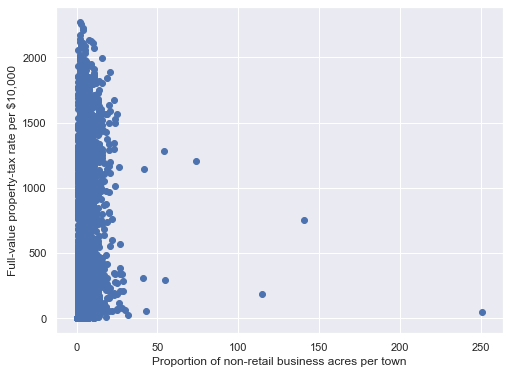

In [66]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(lead_score['TotalVisits'], lead_score['Total Time Spent on Website'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

#### Removing outlier values based on the Interquartile distance for some of the continuous variable

In [67]:
# Q1 = lead_score['TotalVisits'].quantile(0.25)
# Q3 = lead_score['TotalVisits'].quantile(0.75)
# IQR = Q3 - Q1
# lead_score=lead_score.loc[(lead_score['TotalVisits'] >= Q1 - 1.5*IQR) & (lead_score['TotalVisits'] <= Q3 + 1.4*IQR)]

# Q1 = lead_score['Page Views Per Visit'].quantile(0.25)
# Q3 = lead_score['Page Views Per Visit'].quantile(0.75)
# IQR = Q3 - Q1
# lead_score=lead_score.loc[(lead_score['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead_score['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

# lead_score.shape
# Output---(8575, 20)

**Note : We can observe that there are outliers. However, we are not treating them as these outliers can itself impact the conversion of the leads.**

## Data Preparation

In [68]:
## checking the unique values across columns now
## to manually analyze the number of dummy columns that will be created
## for each catagorical column
lead_score.apply(pd.Series.nunique)

Lead Number                               9204
Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1730
Page Views Per Visit                       114
Last Activity                               18
Country                                      2
Specialization                              20
What is your current occupation              7
Tags                                        27
Lead Quality                                 6
Lead Profile                                 6
City                                         7
Asymmetrique Activity Index                  4
Asymmetrique Profile Index                   4
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

#### Converting some binary variables (Yes/No) to 1/0

In [69]:
## As part of model data preparation, converting YES/NO values to 1/0

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

## Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_score[varlist] = lead_score[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [70]:
## Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_variable = pd.get_dummies(lead_score[[
'Lead Origin', 'Lead Source','Specialization',
       'What is your current occupation','Lead Profile','Last Notable Activity','Last Activity','Lead Quality',
        'Country','Tags','City','Asymmetrique Activity Index','Asymmetrique Profile Index']], drop_first=True)

# Adding the results to the master dataframe
lead_score = pd.concat([lead_score, dummy_variable], axis=1)

## Now we can drop the original columns which have been converted to dummies
lead_score = lead_score.drop(['Lead Origin', 'Lead Source','Specialization',
       'What is your current occupation','Lead Profile','Last Notable Activity','Last Activity','Lead Quality',
        'Country','Tags','City','Asymmetrique Activity Index','Asymmetrique Profile Index'], axis=1)

In [71]:
lead_score.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
0       660737             0          0          0.0   
1       660728             0          0          5.0   
2       660727             0          1          2.0   
3       660719             0          0          1.0   
4       660681             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  City_Other Metro Cities  \
0                        0  ...                        0   
1                        0  ...                        0   
2                        0  ...                        0   
3                        0  ...                        0   
4                        0  ...                        0   

   City_Thane & Outskirts  City_Tier II Cities  City_Unknown  \
0                       0                    0             1   
1                       0                    0             1   
2                       0                    0             0   
3                       0                    0             0   
4                       0                    0             0   

   Asymmetrique Activity Index_02.Medium  Asymmetrique Activity Index_03.Low  \
0                                      1                                   0   
1                                      1                                   0   
2                                      1                                   0   
3                                      1                                   0   
4                                      1                                   0   

   Asymmetrique Activity Index_Unknown  Asymmetrique Profile Index_02.Medium  \
0                                    0                                     1   
1                                    0                                     1   
2                                    0                                     0   
3                                    0                                     0   
4                                    0                                     0   

   Asymmetrique Profile Index_03.Low  Asymmetrique Profile Index_Unknown  
0                                  0                                   0  
1                                  0                                   0  
2                                  0                                   0  
3                                  0                                   0  
4                                  0                                   0  

[5 rows x 136 columns]

### Test Train split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
## taking all variables to X ignoring Lead Number and Converted (this is Y variable)
X = lead_score.drop(['Converted','Lead Number'], axis=1)

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   ...  City_Other Metro Cities  City_Thane & Outskirts  City_Tier II Cities  \
0  ...                        0                       0                    0   
1  ...                        0                       0                    0   
2  ...                        0                       0                    0   
3  ...                        0                       0                    0   
4  ...                        0                       0                    0   

   City_Unknown  Asymmetrique Activity Index_02.Medium  \
0             1                                      1   
1             1                                      1   
2             0                                      1   
3             0                                      1   
4             0                                      1   

   Asymmetrique Activity Index_03.Low  Asymmetrique Activity Index_Unknown  \
0                                   0                                    0   
1                                   0                                    0   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

   Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
0                                     1                                  0   
1                                     1                                  0   
2                                     0                                  0   
3                                     0                                  0   
4                                     0                                  0   

   Asymmetrique Profile Index_Unknown  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 134 columns]

In [74]:
## taking Converted as Y variable
y = lead_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# Splitting the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
## Applying the standard scaler across all the numberical variables

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
            X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
5310             0     0.119242                    -0.721902   
2181             0     1.050903                    -0.429014   
8215             0    -0.812419                    -0.905639   
8887             0    -0.346589                    -0.487228   
7920             0     0.119242                    -0.547261   

      Page Views Per Visit  A free copy of Mastering The Interview  \
5310              0.728793                                       1   
2181              2.541043                                       0   
8215             -1.083457                                       0   
8887             -0.177332                                       0   
7920              0.728793                                       1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5310                                    1                          0   
2181                                    1                          0   
8215                                    0                          0   
8887                                    0                          0   
7920                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
5310                        0                           1   
2181                        0                           0   
8215                        0                           0   
8887                        0                           1   
7920                        0                           1   

      Lead Source_Facebook  ...  City_Other Metro Cities  \
5310                     0  ...                        0   
2181                     0  ...                        0   
8215                     0  ...                        0   
8887                     0  ...                        0   
7920                     0  ...                        1   

      City_Thane & Outskirts  City_Tier II Cities  City_Unknown  \
5310                       0                    0             0   
2181                       0                    0             0   
8215                       0                    0             1   
8887                       0                    0             1   
7920                       0                    0             0   

      Asymmetrique Activity Index_02.Medium  \
5310                                      0   
2181                                      1   
8215                                      0   
8887                                      1   
7920                                      1   

      Asymmetrique Activity Index_03.Low  Asymmetrique Activity Index_Unknown  \
5310                                   0                                    1   
2181                                   0                                    0   
8215                                   0                                    0   
8887                                   0                                    0   
7920                                   0                                    0   

      Asymmetrique Profile Index_02.Medium  Asymmetrique Profile Index_03.Low  \
5310                                     0                                  0   
2181                                     0                                  0   
8215                                     1                                  0   
8887                                     1                                  0   
7920                                     1                                  0   

      Asymmetrique Profile Index_Unknown  
5310                                   1  
2181                                   0  
8215                                   0  
8887                                   0  
7920                                   0  

[5 rows x 134 columns]

In [78]:
## checking the percentage of Converted across the data
converted = (sum(lead_score['Converted'])/len(lead_score['Converted'].index))*100
converted

38.374619730551935

#### Looking at Correlations

In [79]:
lead_score.corr()

Lead Number  Do Not Email  Converted  \
Lead Number                              1.000000     -0.098669   0.025006   
Do Not Email                            -0.098669      1.000000  -0.140256   
Converted                                0.025006     -0.140256   1.000000   
TotalVisits                              0.021225      0.035776   0.031540   
Total Time Spent on Website              0.019740     -0.046358   0.366428   
...                                           ...           ...        ...   
Asymmetrique Activity Index_03.Low       0.025139      0.042941  -0.121739   
Asymmetrique Activity Index_Unknown     -0.169373      0.034024   0.011609   
Asymmetrique Profile Index_02.Medium     0.154569     -0.029148  -0.110736   
Asymmetrique Profile Index_03.Low        0.016356      0.003989   0.011969   
Asymmetrique Profile Index_Unknown      -0.169373      0.034024   0.011609   

                                      TotalVisits  \
Lead Number                              0.021225   
Do Not Email                             0.035776   
Converted                                0.031540   
TotalVisits                              1.000000   
Total Time Spent on Website              0.216027   
...                                           ...   
Asymmetrique Activity Index_03.Low       0.009298   
Asymmetrique Activity Index_Unknown     -0.023995   
Asymmetrique Profile Index_02.Medium    -0.073436   
Asymmetrique Profile Index_03.Low        0.022181   
Asymmetrique Profile Index_Unknown      -0.023995   

                                      Total Time Spent on Website  \
Lead Number                                              0.019740   
Do Not Email                                            -0.046358   
Converted                                                0.366428   
TotalVisits                                              0.216027   
Total Time Spent on Website                              1.000000   
...                                                           ...   
Asymmetrique Activity Index_03.Low                      -0.027435   
Asymmetrique Activity Index_Unknown                     -0.014800   
Asymmetrique Profile Index_02.Medium                    -0.106614   
Asymmetrique Profile Index_03.Low                        0.020000   
Asymmetrique Profile Index_Unknown                      -0.014800   

                                      Page Views Per Visit  \
Lead Number                                       0.056922   
Do Not Email                                      0.036620   
Converted                                        -0.001558   
TotalVisits                                       0.511158   
Total Time Spent on Website                       0.312558   
...                                                    ...   
Asymmetrique Activity Index_03.Low                0.020040   
Asymmetrique Activity Index_Unknown              -0.018541   
Asymmetrique Profile Index_02.Medium             -0.117418   
Asymmetrique Profile Index_03.Low                 0.011000   
Asymmetrique Profile Index_Unknown               -0.018541   

                                      A free copy of Mastering The Interview  \
Lead Number                                                        -0.110127   
Do Not Email                                                        0.059052   
Converted                                                          -0.037680   
TotalVisits                                                         0.201295   
Total Time Spent on Website                                         0.167176   
...                                                                      ...   
Asymmetrique Activity Index_03.Low                                  0.007725   
Asymmetrique Activity Index_Unknown                                 0.015900   
Asymmetrique Profile Index_02.Medium                               -0.160516   
Asymmetrique Profile Index_03.Low                                  -0.002938   
Asymmetriq

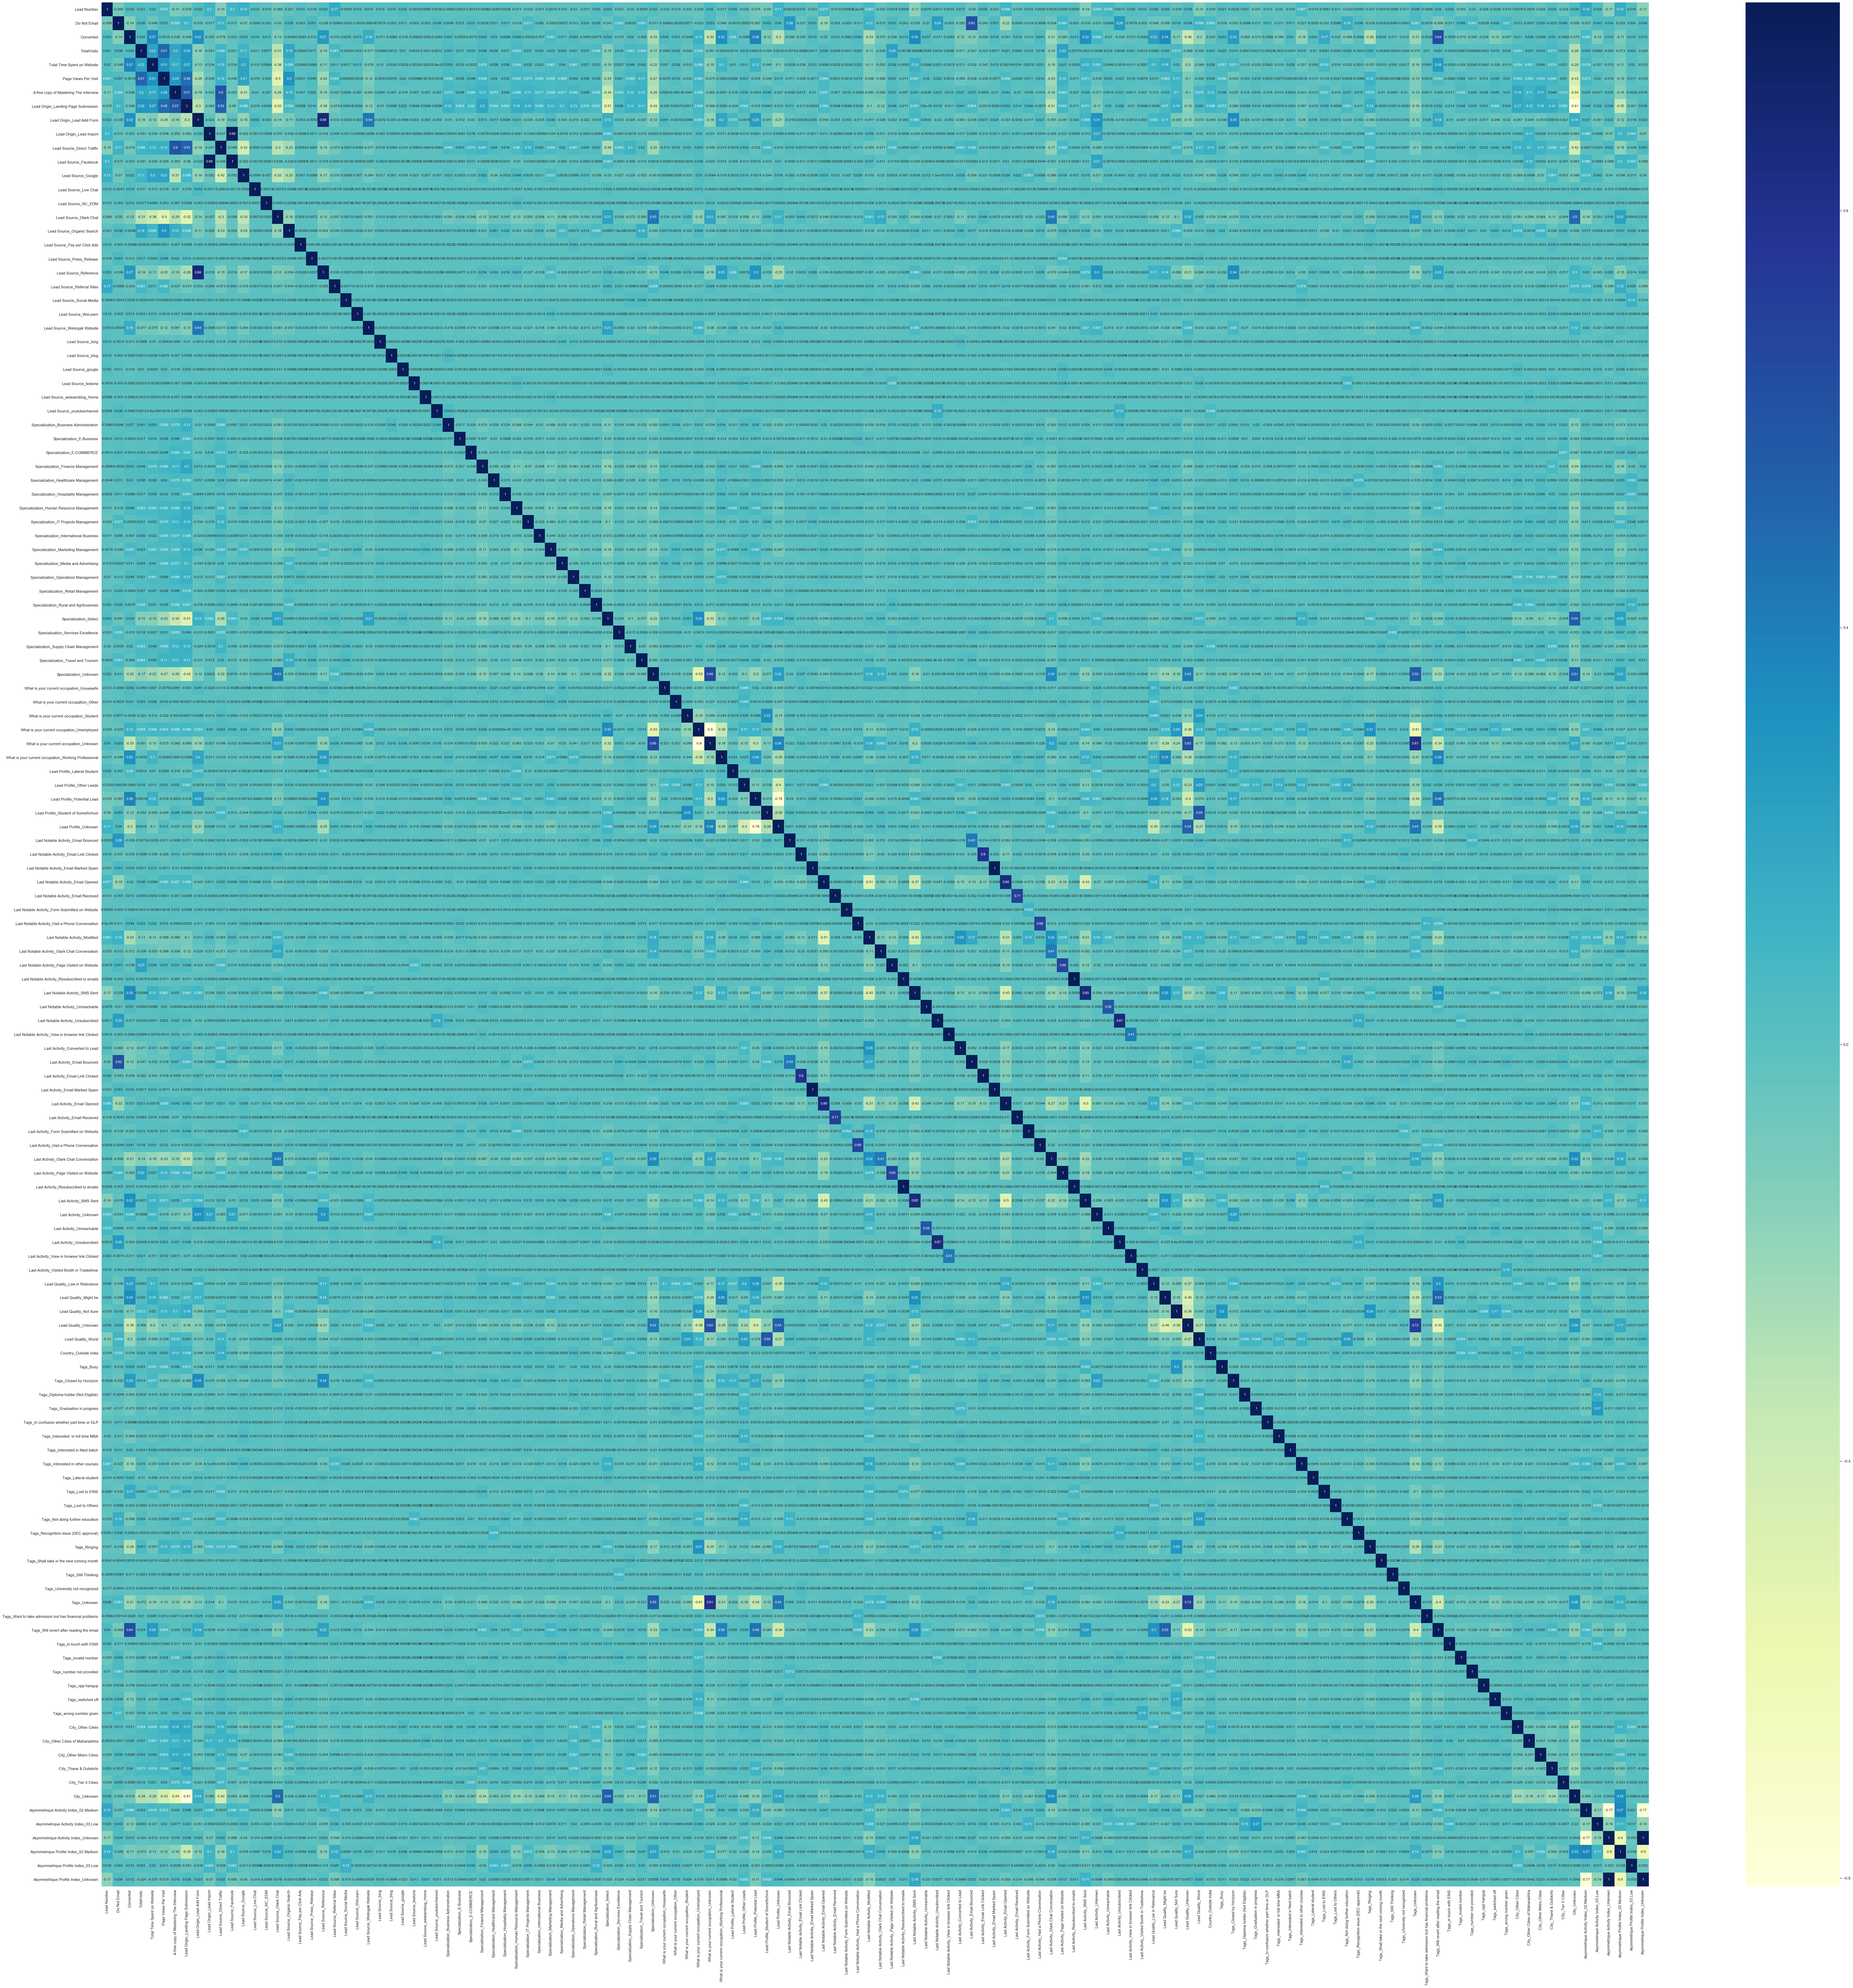

In [82]:
## Let's see the correlation matrix for lead_score

plt.figure(figsize = (100,100))        # Size of the figure
sns.heatmap(lead_score.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [83]:
## After dropping the correlated variables from test and train dataset
## checking the correlation matrix for train dataset

# Let's see the correlation matrix 
# plt.figure(figsize = (100,100))        # Size of the figure
# sns.heatmap(X_train.corr(),annot = True)
# plt.show()

In [84]:
X_train.describe()

Do Not Email   TotalVisits  Total Time Spent on Website  \
count   6442.000000  6.442000e+03                 6.442000e+03   
mean       0.079323  6.228417e-17                 3.908702e-17   
std        0.270264  1.000078e+00                 1.000078e+00   
min        0.000000 -8.124195e-01                -9.056392e-01   
25%        0.000000 -5.795042e-01                -8.728940e-01   
50%        0.000000 -1.136736e-01                -4.326523e-01   
75%        0.000000  3.521569e-01                 8.257657e-01   
max        1.000000  3.202863e+01                 3.227539e+00   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count          6.442000e+03                             6442.000000   
mean           6.203427e-17                                0.311549   
std            1.000078e+00                                0.463163   
min           -1.083457e+00                                0.000000   
25%           -6.303948e-01                                0.000000   
50%           -1.773323e-01                                0.000000   
75%            4.025878e-01                                1.000000   
max            2.383498e+01                                1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          6442.000000                6442.000000   
mean                              0.533685                   0.076063   
std                               0.498903                   0.265120   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Direct Traffic  \
count              6442.000000                 6442.000000   
mean                  0.005123                    0.274915   
std                   0.071395                    0.446506   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    1.000000   
max                   1.000000                    1.000000   

       Lead Source_Facebook  ...  City_Other Metro Cities  \
count           6442.000000  ...              6442.000000   
mean               0.005278  ...                 0.043465   
std                0.072463  ...                 0.203917   
min                0.000000  ...                 0.000000   
25%                0.000000  ...                 0.000000   
50%                0.000000  ...                 0.000000   
75%                0.000000  ...                 0.000000   
max                1.000000  ...                 1.000000   

       City_Thane & Outskirts  City_Tier II Cities  City_Unknown  \
count             6442.000000          6442.000000   6442.000000   
mean                 0.082738             0.006364      0.390251   
std                  0.275508             0.079530      0.487844   
min                  0.000000             0.000000      0.000000   
25%                  0.000000             0.000000      0.000000   
50%                  0.000000             0.000000      0.000000   
75%                  0.000000             0.000000      1.000000   
max                  1.000000             1.000000      1.000000   

       Asymmetrique Activity Index_02.Medium  \
count                            6442.000000   
mean                                0.412450   
std                                 0.492313   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 1.000000   
max     

## Model Building

In [85]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [86]:
## running RFE with 25 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(log_reg, 25)             
rfe = rfe.fit(X_train, y_train)

In [87]:
## chcking status of support for different feature variables
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False,

In [88]:
## checking ranking for all the feature variables as provided by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 92),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 97),
 ('A free copy of Mastering The Interview', False, 80),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Source_Direct Traffic', False, 40),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Live Chat', False, 101),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 41),
 ('Lead Source_Pay per Click Ads', False, 104),
 ('Lead Source_Press_Release', False, 89),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 60),
 ('Lead Source_Social Media', False, 83),
 ('Lead Source_WeLearn', False, 102),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 98),
 ('Lead Source_blog', False, 109),
 ('Lead Source_google', F

In [89]:
## list of all classified 25 feature vaiable picked by RFE
col = X_train.columns[rfe.support_]

In [90]:
## list for all variables who could not make to top 25 feature variables picked by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       ...
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities', 'City_Unknown',
       'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Activity Index_Unknown',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'Asymmetrique Profile Index_Unknown'],
      dtype='object', length=109)

In [91]:
import statsmodels.api as sm

In [92]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                          127
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 01 Mar 2020   Deviance:                          nan
Time:                        16:27:48   Pearson chi2:                 2.39e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1.528e+16   9.89e+07   1.55e+08      0.000    1.53e+16    1.53e+16
Do Not Email                                           -2.071e+14   4.47e+06  -4.63e+07      0.000   -2.07e+14   -2.07e+14
TotalVisits                                             1.592e+12   1.11e+06   1.44e+06      0.000    1.59e+12    1.59e+12
Total Time Spent on Website                             7.216e+13   1.01e+06   7.13e+07      0.000    7.22e+13    7.22e+13
Page Views Per Visit                                   -4.415e+13   1.23e+06  -3.58e+07      0.000   -4.41e+13   -4.41e+13
A free copy of Mastering The Interview                  1.515e+14   2.31e+06   6.57e+07      0.000    1.51e+14    1.51e+14
Lead Origin_Landing Page Submission                    -6.371e+14   3.34e+06   -1.9e+08      0.000   -6.37e+14   -6.37e+14
Lead Origin_Lead Add Form                              -7.637e+14   4.85e+07  -1.57e+07      0.000   -7.64e+14   -7.64e+14
Lead Origin_Lead Import                                 1.646e+16   6.92e+07   2.38e+08      0.000    1.65e+16    1.65e+16
Lead Source_Direct Traffic                             -9.437e+15   6.22e+07  -1.52e+08      0.000   -9.44e+15   -9.44e+15
Lead Source_Facebook                                   -2.627e+16   9.22e+07  -2.85e+08      0.000   -2.63e+16   -2.63e+16
Lead Source_Google                                     -9.426e+15   6.22e+07  -1.52e+08      0.000   -9.43e+15   -9.43e+15
Lead Source_Live Chat                                   1.775e+14   6.16e+07   2.88e+06      0.000    1.77e+14    1.77e+14
Lead Source_NC_EDM                                     -3.138e+15   9.16e+07  -3.43e+07      0.000   -3.14e+15   -3.14e+15
Lead Source_Olark Chat                                 -1.034e+16   6.22e+07  -1.66e+08      0.000   -1.03e+16   -1.03e+16
Lead Source_Organic Search                             -9.682e+15   6.22e+07  -1.56e+08      0.000   -9.68e+15   -9.68e+15
Lead Source_Pay per Click Ads                          -1.231e+16   9.17e+07  -1.34e+08      0.000   -1.23e+16   -1.23e+16
Lead Source_Press_Release                              -1.064e+16   7.87e+07  -1.35e+08      0.000   -1.06e+16   -1.06e+16
Lead Source_Reference                                  -9.643e+15   3.92e+07  -2.46e+08      0.000   -9.64e+15   -9.64e+15
Lead Source_Referral Sites                             -9.972e+15   6.26e+07  -1.59e+08      0.000   -9.97e+15   -9.97e+15
Lead Source_Social Media                               -9.084e+15   7.89e+07  -1.15e+08      0.000   -9.08e+15   -9.08e+15
Lead Source_WeLearn                                    -6.046e+15   9.17e+07  -6.59e+07      0.000   -6.05e+15   -6.05e+15
Lead Sou

In [93]:
## creating model and checking the summary for significance of all variables
X_train_sm = sm.add_constant(X_train[col])
logm25 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
results = logm25.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6416
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1236.2
Date:                Sun, 01 Mar 2020   Deviance:                       2472.5
Time:                        16:27:58   Pearson chi2:                 1.26e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.3891      0.253     -9.454      0.000      -2.884      -1.894
Do Not Email                                      -1.2254      0.249     -4.931      0.000      -1.712      -0.738
Lead Source_Welingak Website                       3.6054      1.023      3.523      0.000       1.600       5.611
Specialization_Travel and Tourism                 -1.0449      0.415     -2.517      0.012      -1.858      -0.231
What is your current occupation_Unknown           -2.5981      0.146    -17.763      0.000      -2.885      -2.311
Lead Profile_Student of SomeSchool                -2.4526      1.056     -2.322      0.020      -4.523      -0.383
Last Notable Activity_Had a Phone Conversation    24.2690   3.35e+04      0.001      0.999   -6.57e+04    6.58e+04
Last Notable Activity_Modified                    -1.1910      0.150     -7.925      0.000      -1.486      -0.896
Last Notable Activity_SMS Sent                     1.0311      0.272      3.787      0.000       0.497       1.565
Last Activity_SMS Sent                             1.3779      0.240      5.752      0.000       0.908       1.847
Lead Quality_Worst                                -1.2789      0.667     -1.919      0.055      -2.585       0.027
Tags_Busy                                          1.9631      0.326      6.017      0.000       1.324       2.602
Tags_Closed by Horizzon                            8.0438      0.759     10.600      0.000       6.556       9.531
Tags_Interested in other courses                  -0.9366      0.494     -1.898      0.058      -1.904       0.031
Tags_Lateral student                              26.0404   8.65e+04      0.000      1.000   -1.69e+05     1.7e+05
Tags_Lost to EINS                                  9.4921      0.820     11.575      0.000       7.885      11.099
Tags_Not doing further education                  -1.2098      1.067     -1.133      0.257      -3.302       0.882
Tags_Ringing                                      -2.4171      0.339     -7.136      0.000      -3.081      -1.753
Tags_Unknown                                       2.9066      0.273     10.630      0.000       2.371       3.443
Tags_Will revert after reading the email           5.6993      0.294     19.409      0.000       5.124       6.275
Tags_in touch with EINS                            2.2673      0.894      2.535      0.011       0.514       4.020
Tags_invalid number                               -2.6403      1.059     -2.493      0.013      -4.716      -0.564
Tags_number not provided                         -22.7815   2.32e+04     -0.001      0.999   -4.56e+04    4.55e+04
Tags_switched off                                 -2.5855      0.578     -4.477      0.000   

From the above summary the variable `Tags_NUMBER NOT PROVIDED	` was found insignificant based on high p value. Therefore
this variable needs to be dropped.

In [94]:
## dropping the variable "Tags_NUMBER NOT PROVIDED" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Tags_number not provided',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm24 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm24.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6417
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1239.9
Date:                Sun, 01 Mar 2020   Deviance:                       2479.8
Time:                        16:28:26   Pearson chi2:                 1.24e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.5545      0.254    -10.055      0.000      -3.052      -2.057
Do Not Email                                      -1.2461      0.247     -5.054      0.000      -1.729      -0.763
Lead Source_Welingak Website                       3.6070      1.023      3.525      0.000       1.601       5.613
Specialization_Travel and Tourism                 -1.0379      0.416     -2.498      0.012      -1.852      -0.223
What is your current occupation_Unknown           -2.5926      0.146    -17.768      0.000      -2.879      -2.307
Lead Profile_Student of SomeSchool                -2.4452      1.071     -2.284      0.022      -4.544      -0.347
Last Notable Activity_Had a Phone Conversation    24.4212   3.34e+04      0.001      0.999   -6.55e+04    6.55e+04
Last Notable Activity_Modified                    -1.1895      0.150     -7.907      0.000      -1.484      -0.895
Last Notable Activity_SMS Sent                     1.0068      0.272      3.702      0.000       0.474       1.540
Last Activity_SMS Sent                             1.3733      0.240      5.732      0.000       0.904       1.843
Lead Quality_Worst                                -1.2046      0.669     -1.800      0.072      -2.516       0.107
Tags_Busy                                          2.1391      0.325      6.574      0.000       1.501       2.777
Tags_Closed by Horizzon                            8.2075      0.759     10.807      0.000       6.719       9.696
Tags_Interested in other courses                  -0.7690      0.493     -1.560      0.119      -1.735       0.197
Tags_Lateral student                              26.2134   8.66e+04      0.000      1.000    -1.7e+05     1.7e+05
Tags_Lost to EINS                                  9.6387      0.820     11.753      0.000       8.031      11.246
Tags_Not doing further education                  -1.0462      1.066     -0.981      0.326      -3.136       1.043
Tags_Ringing                                      -2.2273      0.336     -6.626      0.000      -2.886      -1.568
Tags_Unknown                                       3.0761      0.274     11.228      0.000       2.539       3.613
Tags_Will revert after reading the email           5.8665      0.294     19.921      0.000       5.289       6.444
Tags_in touch with EINS                            2.4335      0.894      2.723      0.006       0.682       4.185
Tags_invalid number                               -2.4565      1.058     -2.322      0.020      -4.530      -0.383
Tags_switched off                                 -2.3943      0.576     -4.158      0.000      -3.523      -1.266
Tags_wrong number given                          -22.7391   2.07e+04     -0.001      0.999   

From the above summary the variable `Tags_WRONG NUMBER GIVEN` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [95]:
## dropping the variable "Tags_WRONG NUMBER GIVEN" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Tags_wrong number given',1)
X_train_sm =sm.add_constant(X_train[col]) 
logm23 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm23.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.5
Date:                Sun, 01 Mar 2020   Deviance:                       2489.1
Time:                        16:28:39   Pearson chi2:                 1.23e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.7613      0.255    -10.835      0.000      -3.261      -2.262
Do Not Email                                      -1.2672      0.245     -5.180      0.000      -1.747      -0.788
Lead Source_Welingak Website                       3.6089      1.023      3.527      0.000       1.603       5.614
Specialization_Travel and Tourism                 -1.0601      0.411     -2.578      0.010      -1.866      -0.254
What is your current occupation_Unknown           -2.5862      0.146    -17.771      0.000      -2.871      -2.301
Lead Profile_Student of SomeSchool                -2.4087      1.091     -2.208      0.027      -4.547      -0.271
Last Notable Activity_Had a Phone Conversation    22.6166   1.23e+04      0.002      0.999    -2.4e+04    2.41e+04
Last Notable Activity_Modified                    -1.1878      0.151     -7.885      0.000      -1.483      -0.893
Last Notable Activity_SMS Sent                     0.9853      0.271      3.630      0.000       0.453       1.517
Last Activity_SMS Sent                             1.3621      0.239      5.689      0.000       0.893       1.831
Lead Quality_Worst                                -1.1916      0.671     -1.776      0.076      -2.507       0.124
Tags_Busy                                          2.3596      0.324      7.292      0.000       1.725       2.994
Tags_Closed by Horizzon                            8.4130      0.760     11.073      0.000       6.924       9.902
Tags_Interested in other courses                  -0.5550      0.492     -1.127      0.260      -1.520       0.410
Tags_Lateral student                              24.4342   3.19e+04      0.001      0.999   -6.25e+04    6.25e+04
Tags_Lost to EINS                                  9.8352      0.821     11.984      0.000       8.227      11.444
Tags_Not doing further education                  -0.8289      1.065     -0.778      0.436      -2.916       1.258
Tags_Ringing                                      -1.9926      0.333     -5.992      0.000      -2.644      -1.341
Tags_Unknown                                       3.2883      0.274     12.009      0.000       2.752       3.825
Tags_Will revert after reading the email           6.0775      0.295     20.631      0.000       5.500       6.655
Tags_in touch with EINS                            2.6432      0.892      2.962      0.003       0.894       4.392
Tags_invalid number                               -2.2214      1.057     -2.102      0.036      -4.292      -0.150
Tags_switched off                                 -2.1569      0.573     -3.762      0.000      -3.281      -1.033
Asymmetrique Activity Index_03.Low                -2.1620      0.422     -5.123      0.000   

From the above summary the variable `Tags_Lateral student` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [96]:
## dropping the variable "Tags_Lateral student" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Tags_Lateral student',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm22 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm22.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6419
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1248.0
Date:                Sun, 01 Mar 2020   Deviance:                       2496.0
Time:                        16:29:50   Pearson chi2:                 1.23e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.6761      0.246    -10.864      0.000      -3.159      -2.193
Do Not Email                                      -1.2760      0.244     -5.221      0.000      -1.755      -0.797
Lead Source_Welingak Website                       3.6047      1.023      3.523      0.000       1.599       5.610
Specialization_Travel and Tourism                 -1.0658      0.410     -2.598      0.009      -1.870      -0.262
What is your current occupation_Unknown           -2.5913      0.146    -17.792      0.000      -2.877      -2.306
Lead Profile_Student of SomeSchool                -2.4037      1.085     -2.216      0.027      -4.529      -0.278
Last Notable Activity_Had a Phone Conversation    22.5353   1.23e+04      0.002      0.999    -2.4e+04    2.41e+04
Last Notable Activity_Modified                    -1.1873      0.151     -7.886      0.000      -1.482      -0.892
Last Notable Activity_SMS Sent                     0.9522      0.270      3.528      0.000       0.423       1.481
Last Activity_SMS Sent                             1.4003      0.238      5.885      0.000       0.934       1.867
Lead Quality_Worst                                -1.2518      0.668     -1.875      0.061      -2.561       0.057
Tags_Busy                                          2.2682      0.317      7.156      0.000       1.647       2.889
Tags_Closed by Horizzon                            8.3268      0.757     11.001      0.000       6.843       9.810
Tags_Interested in other courses                  -0.6414      0.488     -1.313      0.189      -1.599       0.316
Tags_Lost to EINS                                  9.7657      0.819     11.920      0.000       8.160      11.371
Tags_Not doing further education                  -0.9068      1.064     -0.853      0.394      -2.991       1.178
Tags_Ringing                                      -2.0824      0.326     -6.383      0.000      -2.722      -1.443
Tags_Unknown                                       3.2026      0.266     12.041      0.000       2.681       3.724
Tags_Will revert after reading the email           5.9910      0.287     20.856      0.000       5.428       6.554
Tags_in touch with EINS                            2.5513      0.891      2.863      0.004       0.805       4.298
Tags_invalid number                               -2.3053      1.055     -2.185      0.029      -4.373      -0.237
Tags_switched off                                 -2.2457      0.570     -3.940      0.000      -3.363      -1.129
Asymmetrique Activity Index_03.Low                -2.1683      0.422     -5.142      0.000      -2.995      -1.342
=============================================================================================

From the above summary the variable `Last Notable Activity_Had a Phone Conversation` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [97]:
## dropping the variable "Last Notable Activity_Had a Phone Conversation" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm21 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm21.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6420
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1251.2
Date:                Sun, 01 Mar 2020   Deviance:                       2502.3
Time:                        16:30:14   Pearson chi2:                 1.23e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6193      0.242    -10.827      0.000      -3.093      -2.145
Do Not Email                                -1.2808      0.244     -5.241      0.000      -1.760      -0.802
Lead Source_Welingak Website                 3.6066      1.023      3.524      0.000       1.601       5.612
Specialization_Travel and Tourism           -1.0557      0.408     -2.587      0.010      -1.855      -0.256
What is your current occupation_Unknown     -2.5902      0.146    -17.789      0.000      -2.876      -2.305
Lead Profile_Student of SomeSchool          -2.4066      1.081     -2.226      0.026      -4.525      -0.288
Last Notable Activity_Modified              -1.1960      0.151     -7.946      0.000      -1.491      -0.901
Last Notable Activity_SMS Sent               0.9411      0.270      3.488      0.000       0.412       1.470
Last Activity_SMS Sent                       1.4020      0.238      5.891      0.000       0.936       1.868
Lead Quality_Worst                          -1.2876      0.665     -1.935      0.053      -2.592       0.017
Tags_Busy                                    2.2164      0.314      7.064      0.000       1.602       2.831
Tags_Closed by Horizzon                      8.2769      0.756     10.955      0.000       6.796       9.758
Tags_Interested in other courses            -0.6908      0.486     -1.420      0.156      -1.644       0.263
Tags_Lost to EINS                            9.7247      0.819     11.878      0.000       8.120      11.329
Tags_Not doing further education            -0.9519      1.063     -0.896      0.370      -3.035       1.131
Tags_Ringing                                -2.1311      0.323     -6.590      0.000      -2.765      -1.497
Tags_Unknown                                 3.1494      0.262     12.019      0.000       2.636       3.663
Tags_Will revert after reading the email     5.9478      0.284     20.976      0.000       5.392       6.504
Tags_in touch with EINS                      2.4994      0.890      2.808      0.005       0.755       4.244
Tags_invalid number                         -2.3506      1.054     -2.229      0.026      -4.417      -0.284
Tags_switched off                           -2.2935      0.568     -4.036      0.000      -3.407      -1.180
Asymmetrique Activity Index_03.Low          -2.1732      0.422     -5.150      0.000      -3.000      -1.346
============================================================================================================
"""

From the above summary the variable `Tags_Interested in other courses` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [98]:
## dropping the variable "Tags_Interested in other courses" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Tags_Interested in other courses',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm20 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm20.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6421
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1252.3
Date:                Sun, 01 Mar 2020   Deviance:                       2504.5
Time:                        16:31:15   Pearson chi2:                 1.24e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8074      0.215    -13.069      0.000      -3.228      -2.386
Do Not Email                                -1.2659      0.245     -5.168      0.000      -1.746      -0.786
Lead Source_Welingak Website                 3.6084      1.023      3.526      0.000       1.603       5.614
Specialization_Travel and Tourism           -1.0535      0.409     -2.578      0.010      -1.854      -0.253
What is your current occupation_Unknown     -2.5912      0.146    -17.781      0.000      -2.877      -2.306
Lead Profile_Student of SomeSchool          -2.3848      1.099     -2.170      0.030      -4.538      -0.231
Last Notable Activity_Modified              -1.2102      0.150     -8.065      0.000      -1.504      -0.916
Last Notable Activity_SMS Sent               0.9409      0.270      3.489      0.000       0.412       1.469
Last Activity_SMS Sent                       1.4094      0.238      5.932      0.000       0.944       1.875
Lead Quality_Worst                          -1.2418      0.665     -1.868      0.062      -2.545       0.061
Tags_Busy                                    2.4037      0.293      8.192      0.000       1.829       2.979
Tags_Closed by Horizzon                      8.4746      0.746     11.360      0.000       7.012       9.937
Tags_Lost to EINS                            9.9095      0.811     12.216      0.000       8.320      11.499
Tags_Not doing further education            -0.7727      1.058     -0.731      0.465      -2.846       1.300
Tags_Ringing                                -1.9490      0.305     -6.396      0.000      -2.546      -1.352
Tags_Unknown                                 3.3385      0.237     14.102      0.000       2.875       3.803
Tags_Will revert after reading the email     6.1396      0.259     23.669      0.000       5.631       6.648
Tags_in touch with EINS                      2.6912      0.883      3.047      0.002       0.960       4.422
Tags_invalid number                         -2.1729      1.049     -2.071      0.038      -4.229      -0.117
Tags_switched off                           -2.1129      0.558     -3.786      0.000      -3.207      -1.019
Asymmetrique Activity Index_03.Low          -2.1669      0.423     -5.126      0.000      -2.995      -1.338
============================================================================================================
"""

From the above summary the variable `Tags_Not doing further education` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [99]:
## dropping the variable "Tags_Not doing further education" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Tags_Not doing further education',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm19 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm19.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6422
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1252.6
Date:                Sun, 01 Mar 2020   Deviance:                       2505.2
Time:                        16:31:32   Pearson chi2:                 1.24e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8417      0.212    -13.414      0.000      -3.257      -2.427
Do Not Email                                -1.2720      0.244     -5.202      0.000      -1.751      -0.793
Lead Source_Welingak Website                 3.6090      1.023      3.526      0.000       1.603       5.615
Specialization_Travel and Tourism           -1.0522      0.409     -2.573      0.010      -1.853      -0.251
What is your current occupation_Unknown     -2.5918      0.146    -17.782      0.000      -2.877      -2.306
Lead Profile_Student of SomeSchool          -2.3625      1.103     -2.142      0.032      -4.524      -0.201
Last Notable Activity_Modified              -1.2098      0.150     -8.062      0.000      -1.504      -0.916
Last Notable Activity_SMS Sent               0.9434      0.270      3.499      0.000       0.415       1.472
Last Activity_SMS Sent                       1.4084      0.238      5.929      0.000       0.943       1.874
Lead Quality_Worst                          -1.2858      0.661     -1.946      0.052      -2.581       0.010
Tags_Busy                                    2.4377      0.291      8.369      0.000       1.867       3.009
Tags_Closed by Horizzon                      8.5081      0.745     11.417      0.000       7.048       9.969
Tags_Lost to EINS                            9.9500      0.811     12.276      0.000       8.361      11.539
Tags_Ringing                                -1.9158      0.303     -6.328      0.000      -2.509      -1.322
Tags_Unknown                                 3.3731      0.234     14.415      0.000       2.914       3.832
Tags_Will revert after reading the email     6.1738      0.257     24.024      0.000       5.670       6.677
Tags_in touch with EINS                      2.7254      0.882      3.088      0.002       0.996       4.455
Tags_invalid number                         -2.1357      1.048     -2.037      0.042      -4.191      -0.081
Tags_switched off                           -2.0790      0.557     -3.732      0.000      -3.171      -0.987
Asymmetrique Activity Index_03.Low          -2.1667      0.423     -5.125      0.000      -2.995      -1.338
============================================================================================================
"""

From the above summary the variable `Lead Quality_Worst` was found insignificant based on high p value. Therefore this variable needs to be dropped.

In [100]:
## dropping the variable "Lead Quality_Worst" from the data set
## and creating the model again with remaining varibles of RFE
col = col.drop('Lead Quality_Worst',1)
X_train_sm = sm.add_constant(X_train[col]) 
logm18 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm18.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6442
Model:                            GLM   Df Residuals:                     6423
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.2
Date:                Sun, 01 Mar 2020   Deviance:                       2510.3
Time:                        16:32:19   Pearson chi2:                 1.25e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0244      0.202    -14.972      0.000      -3.420      -2.628
Do Not Email                                -1.2868      0.244     -5.285      0.000      -1.764      -0.810
Lead Source_Welingak Website                 3.6126      1.023      3.530      0.000       1.607       5.619
Specialization_Travel and Tourism           -1.0570      0.409     -2.585      0.010      -1.859      -0.255
What is your current occupation_Unknown     -2.5921      0.146    -17.754      0.000      -2.878      -2.306
Lead Profile_Student of SomeSchool          -2.8111      1.037     -2.710      0.007      -4.844      -0.778
Last Notable Activity_Modified              -1.2080      0.150     -8.052      0.000      -1.502      -0.914
Last Notable Activity_SMS Sent               0.9594      0.270      3.559      0.000       0.431       1.488
Last Activity_SMS Sent                       1.4088      0.238      5.930      0.000       0.943       1.874
Tags_Busy                                    2.6150      0.285      9.174      0.000       2.056       3.174
Tags_Closed by Horizzon                      8.7052      0.743     11.715      0.000       7.249      10.162
Tags_Lost to EINS                           10.0084      0.805     12.430      0.000       8.430      11.587
Tags_Ringing                                -1.7469      0.297     -5.874      0.000      -2.330      -1.164
Tags_Unknown                                 3.5523      0.226     15.734      0.000       3.110       3.995
Tags_Will revert after reading the email     6.3607      0.249     25.592      0.000       5.874       6.848
Tags_in touch with EINS                      2.9060      0.881      3.300      0.001       1.180       4.632
Tags_invalid number                         -2.1710      1.045     -2.077      0.038      -4.220      -0.122
Tags_switched off                           -1.9365      0.555     -3.491      0.000      -3.024      -0.849
Asymmetrique Activity Index_03.Low          -2.1664      0.423     -5.120      0.000      -2.996      -1.337
============================================================================================================
"""

###### The above model now appears to be significant.

In [101]:
## Now let us getting the prediction probability values from the model
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

5310    0.082941
2181    0.046337
8215    0.036538
8887    0.575412
7920    0.112623
4947    0.996680
3073    0.965655
2722    0.996680
499     0.014311
8330    0.988714
dtype: float64

In [102]:
## reshaping the values to get an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08294075, 0.0463368 , 0.03653806, 0.57541241, 0.11262316,
       0.99668025, 0.965655  , 0.99668025, 0.01431075, 0.9887141 ])

In [103]:
## putting the model provided probability values and the actual values in a dataframe along with row numbers
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob    ID
0          0        0.082941  5310
1          0        0.046337  2181
2          0        0.036538  8215
3          0        0.575412  8887
4          0        0.112623  7920

In [104]:
## making the predictions based on the probability with the cut-off value as 0.5
## this cut-off value will be tuned later for determining the hot leads

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted
0          0        0.082941  5310          0
1          0        0.046337  2181          0
2          0        0.036538  8215          0
3          0        0.575412  8887          1
4          0        0.112623  7920          0

In [105]:
from sklearn import metrics

In [106]:
## In order to determine the accuracy of the model we first
## need to prepare the Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3694  206]
 [ 229 2313]]


In [107]:
## Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9324743868363862


#### Check the VIF now

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                      const  9.74
7             Last Notable Activity_SMS Sent  4.87
13                              Tags_Unknown  4.59
8                     Last Activity_SMS Sent  4.21
4    What is your current occupation_Unknown  3.22
14  Tags_Will revert after reading the email  2.37
12                              Tags_Ringing  1.78
6             Last Notable Activity_Modified  1.47
10                   Tags_Closed by Horizzon  1.25
17                         Tags_switched off  1.18
9                                  Tags_Busy  1.17
5         Lead Profile_Student of SomeSchool  1.15
11                         Tags_Lost to EINS  1.14
2               Lead Source_Welingak Website  1.11
16                       Tags_invalid number  1.06
1                               Do Not Email  1.05
18        Asymmetrique Activity Index_03.Low  1.04
3          Specialization_Travel and Tourism  1.01
15                   Tags_in touch with EINS  1.01

###### VIF for all the variables is less than five and initial acuracy is also looking very good. For model we don't need any further changes in variables. For the accuracy and other model evaluations ,we need to work further with the cut-off value to determine that value that optimize this model.

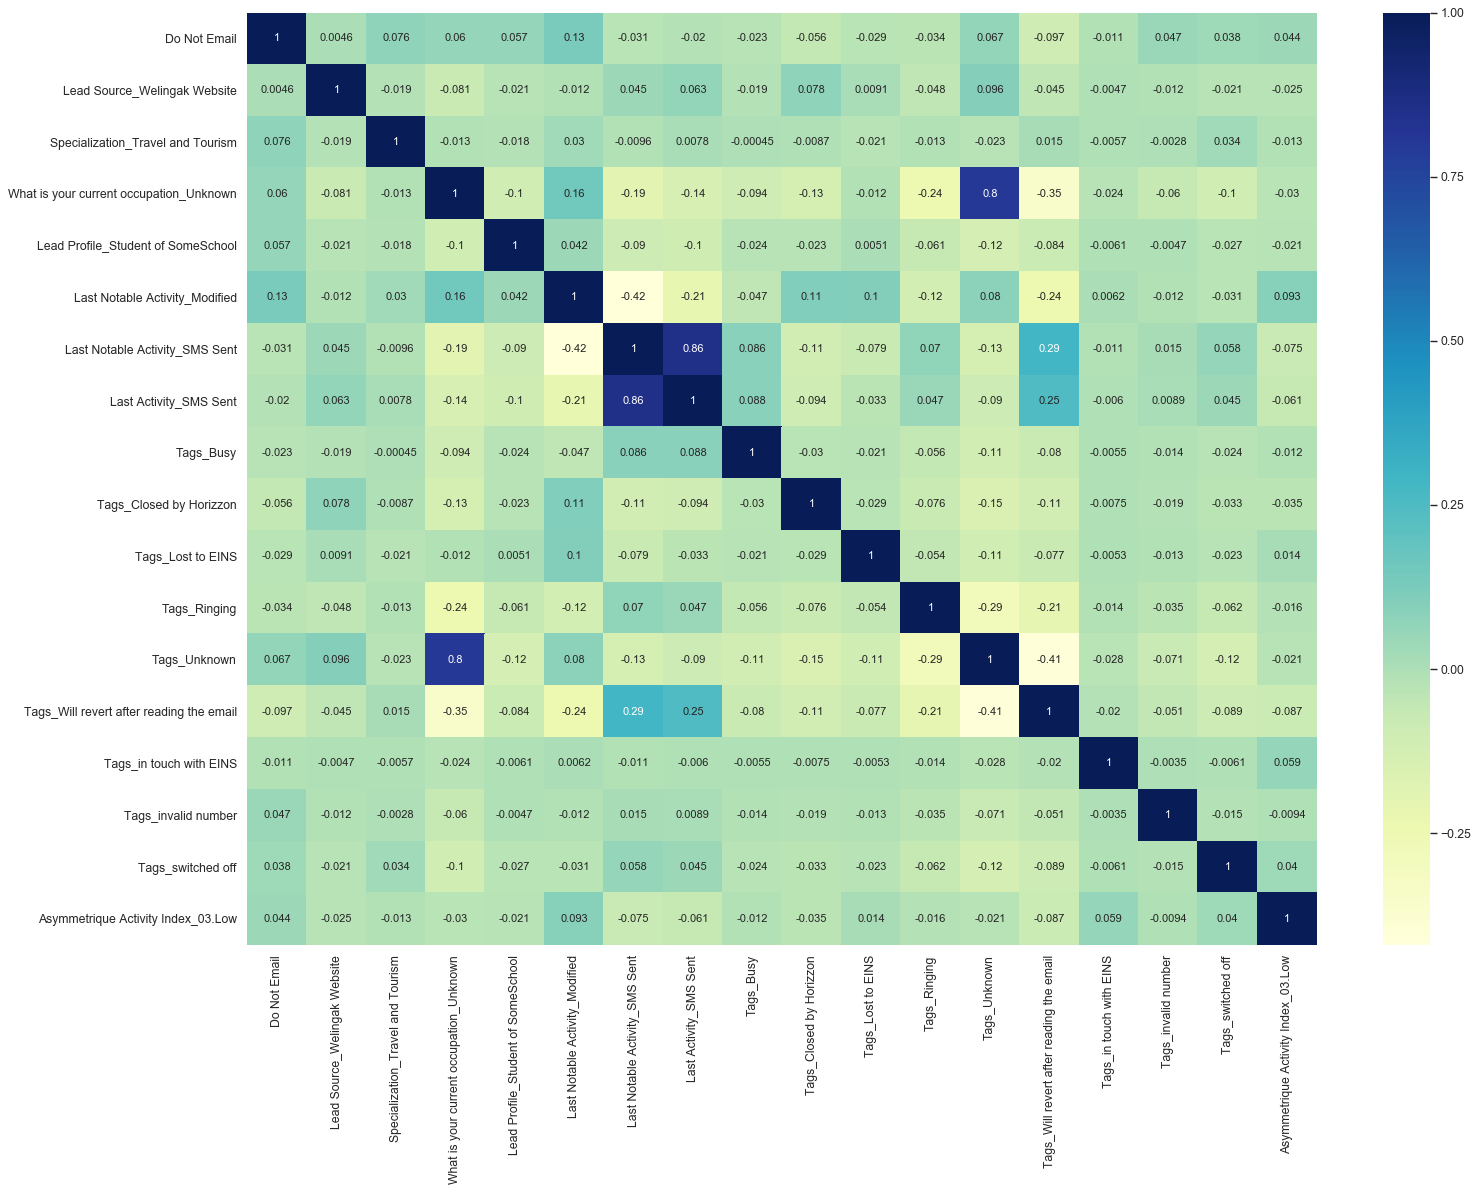

In [110]:
#Let us now check the correlation among the features in the below heat map.

# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

## Model evaluation and optimization

In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate = ", FP/ float(TN+FP))

# positive predictive value 
print ("Positive Predictive Value = ",TP / float(TP+FP))

# Negative predictive value
print ("Negative Predictive Value = ",TN / float(TN+ FN))


Sensitivity =  0.9099134539732494
Specificity =  0.9471794871794872
False Postive Rate =  0.05282051282051282
Positive Predictive Value =  0.9182215164747916
Negative Predictive Value =  0.9416263063981647


#### Plotting ROC Curve

In [112]:
## function to draw the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for model')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
## using roc_cuve from the matrics
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

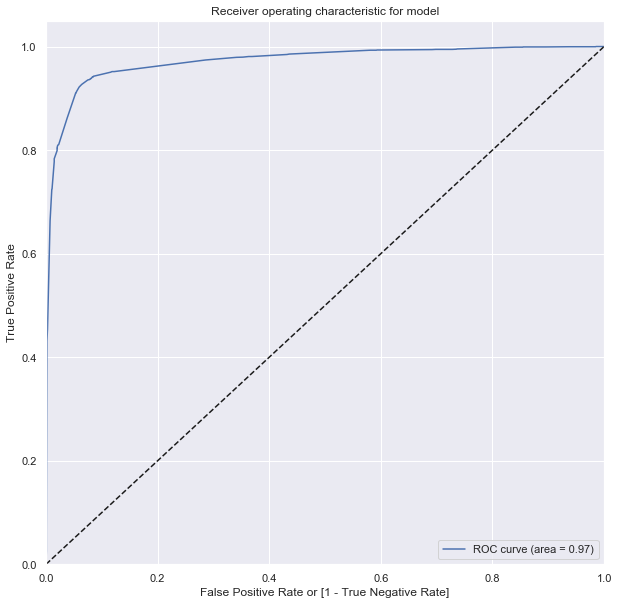

In [114]:
## draw ROC curve based on the probability values generated by the model
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.082941  5310          0    1    0    0    0    0    0   
1          0        0.046337  2181          0    1    0    0    0    0    0   
2          0        0.036538  8215          0    1    0    0    0    0    0   
3          0        0.575412  8887          1    1    1    1    1    1    1   
4          0        0.112623  7920          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [116]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity','pos_pred_val','neg_pred_val'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    pos_pred_val = cm1[1,1] /(cm1[1,1]+cm1[0,1])
    neg_pred_val = cm1[0,0]/(cm1[0,0]+cm1[1,0])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity,pos_pred_val, neg_pred_val ]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity  pos_pred_val  neg_pred_val
0.0   0.0  0.394598     1.000000     0.000000      0.394598           NaN
0.1   0.1  0.816982     0.974036     0.714615      0.689886      0.976866
0.2   0.2  0.927352     0.938238     0.920256      0.884644      0.958089
0.3   0.3  0.927662     0.936271     0.922051      0.886736      0.956892
0.4   0.4  0.932630     0.913061     0.945385      0.915943      0.943449
0.5   0.5  0.932474     0.909913     0.947179      0.918222      0.941626
0.6   0.6  0.922540     0.861526     0.962308      0.937099      0.914251
0.7   0.7  0.911829     0.808025     0.979487      0.962512      0.886722
0.8   0.8  0.910432     0.803304     0.980256      0.963662      0.884340
0.9   0.9  0.885284     0.725806     0.989231      0.977742      0.846981


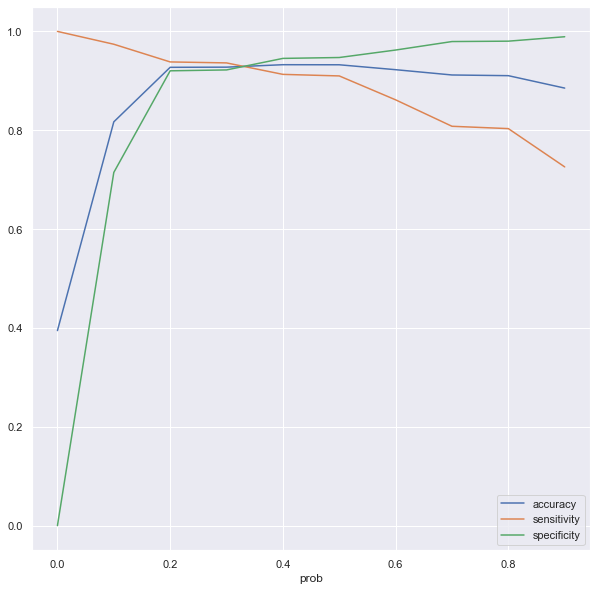

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'],figsize=(10, 10))
plt.show()

**Note** : As per the above plot the optimize value comes at **0.35**. However, our business case is more focused on creating the pool of hot leads which needs to have the more positive prediction value, we hold this value and performs further analysis based on positive predictive value and negative predictive value.

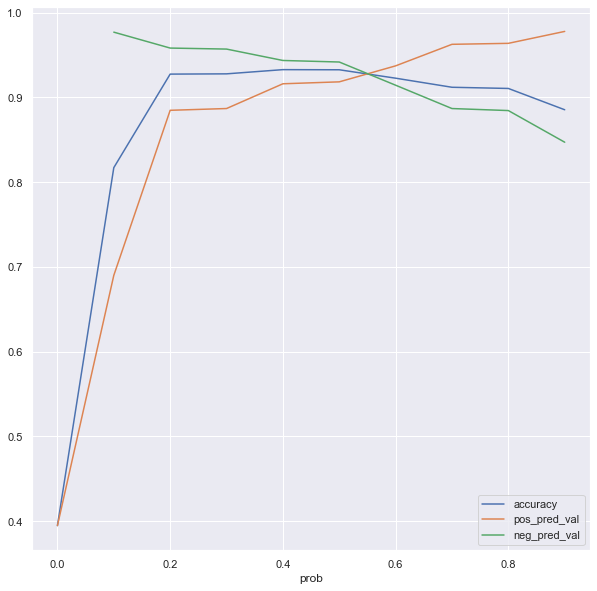

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','pos_pred_val','neg_pred_val'],figsize=(10, 10))
plt.show()

###### From the above plot we can see the values for postive predictive value and negative predictive values coincides at probability value of 0.56 which looks like the optimal cut-off value based on our business requirement which wishes to classify the hots leads as more predictive possibility of converting the lead. Therefore we are taking 0.56 as the final value as per our requirement.

In [119]:
## making our final prediction on basis of optimal cut-off of 0.56
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.56 else 0)

y_train_pred_final.head()

Converted  Converted_Prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.082941  5310          0    1    0    0    0    0    0   
1          0        0.046337  2181          0    1    0    0    0    0    0   
2          0        0.036538  8215          0    1    0    0    0    0    0   
3          0        0.575412  8887          1    1    1    1    1    1    1   
4          0        0.112623  7920          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    0    0    0    0                1  
4    0    0    0    0                0

In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9323191555417573

In [121]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3694,  206],
       [ 230, 2312]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate = ", FP/ float(TN+FP))

# positive predictive value 
print ("Positive Predictive Value = ",TP / float(TP+FP))

# Negative predictive value
print ("Negative Predictive Value = ",TN / float(TN+ FN))

Sensitivity =  0.9095200629425649
Specificity =  0.9471794871794872
False Postive Rate =  0.05282051282051282
Positive Predictive Value =  0.9181890389197777
Negative Predictive Value =  0.9413863404689092


#### Business Evaluation : Precision and Recall

In [123]:
## Recreating the final confusion matrix
confusion_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_final

array([[3694,  206],
       [ 230, 2312]], dtype=int64)

In [124]:
## Precision
confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1])

0.9181890389197777

In [125]:
## Recall
confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1])

0.9095200629425649

In [126]:
from sklearn.metrics import precision_score, recall_score

In [127]:
## using precision_score to evaluate matrics
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9181890389197777

In [128]:
## using recall_score to evaluate matrics
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9095200629425649

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
## using precision_recall_curve from matrics
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

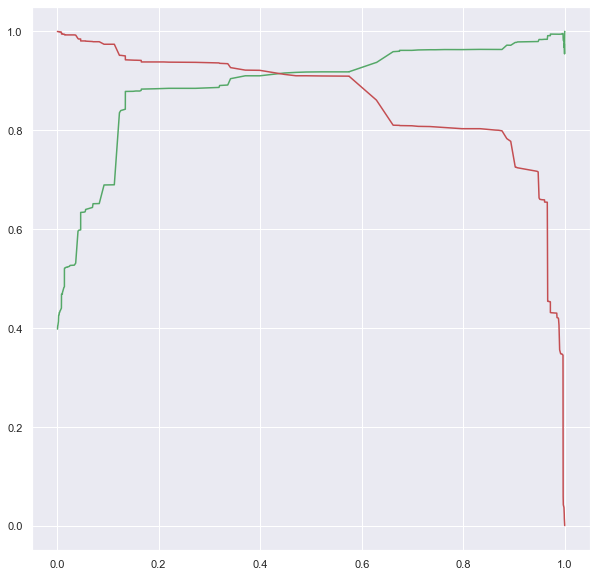

In [131]:
## creating plot from the precision recall curve
plt.figure(figsize=(10, 10))
plt.plot(thresholds, p[:-1], "g-", label ="precision")
plt.plot(thresholds, r[:-1], "r-", label ="recall")
plt.show()

## Making prediction for the test data

In [132]:
## transforming using scaler for the numerical values
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits'
                                                ,'Total Time Spent on Website','Page Views Per Visit']])

In [133]:
## extracting the featured variables for test dataset
X_test = X_test[col]
X_test.head()

Do Not Email  Lead Source_Welingak Website  \
2400             0                             0   
849              0                             0   
7459             0                             0   
6184             1                             0   
4869             0                             0   

      Specialization_Travel and Tourism  \
2400                                  0   
849                                   0   
7459                                  0   
6184                                  0   
4869                                  0   

      What is your current occupation_Unknown  \
2400                                        0   
849                                         1   
7459                                        0   
6184                                        0   
4869                                        0   

      Lead Profile_Student of SomeSchool  Last Notable Activity_Modified  \
2400                                   0                               0   
849                                    0                               1   
7459                                   0                               0   
6184                                   0                               1   
4869                                   0                               0   

      Last Notable Activity_SMS Sent  Last Activity_SMS Sent  Tags_Busy  \
2400                               1                       1          0   
849                                0                       0          0   
7459                               0                       0          0   
6184                               0                       1          0   
4869                               0                       0          0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  Tags_Unknown  \
2400                        0                  0             0             0   
849                         0                  0             0             1   
7459                        0                  0             0             0   
6184                        0                  0             0             0   
4869                        0                  0             0             0   

      Tags_Will revert after reading the email  Tags_in touch with EINS  \
2400                                         1                        0   
849                                          0                        0   
7459                                         0                        0   
6184                                         0                        0   
4869                                         1                        0   

      Tags_invalid number  Tags_switched off  \
2400                    0                  0   
849                     0                  0   
7459                    0                  0   
6184                    0                  0   
4869                    0                  0   

      Asymmetrique Activity Index_03.Low  
2400                                   0  
849                                    0  
7459                                   0  
6184                                   0  
4869                                   0

In [134]:
## adding constant to the test dataset
X_test_sm = sm.add_constant(X_test)

In [135]:
## making prediction probabilities
y_test_pred = result.predict(X_test_sm)

In [136]:
## checking values
y_test_pred[:10]

2400    0.996680
849     0.036538
7459    0.046337
6184    0.016137
4869    0.965655
2519    0.996680
5419    0.008399
2103    0.965655
3987    0.036538
3512    0.000872
dtype: float64

In [137]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

0
2400  0.996680
849   0.036538
7459  0.046337
6184  0.016137
4869  0.965655

In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

y_test_df['ID'] = y_test_df.index

In [139]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted    ID         0
0          1  2400  0.996680
1          0   849  0.036538
2          0  7459  0.046337
3          1  6184  0.016137
4          1  4869  0.965655

In [141]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

ID  Converted  Converted_Prob
0  2400          1        0.996680
1   849          0        0.036538
2  7459          0        0.046337
3  6184          1        0.016137
4  4869          1        0.965655

In [142]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.39 else 0)

In [143]:
y_pred_final.head()

ID  Converted  Converted_Prob  final_predicted
0  2400          1        0.996680                1
1   849          0        0.036538                0
2  7459          0        0.046337                0
3  6184          1        0.016137                0
4  4869          1        0.965655                1

In [144]:
# Let's check the overall accuracy.
ac_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
ac_score

0.9370021723388848

In [145]:
## creating confusion matrix for test data
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1676,   96],
       [  78,  912]], dtype=int64)

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
 

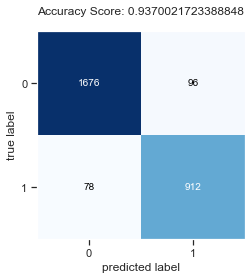

In [147]:


import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion2)
all_sample_title = 'Accuracy Score: {0}'.format(ac_score)
plt.title(all_sample_title, size = 12);
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = " , TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate = ", FP/ float(TN+FP))

# positive predictive value 
print ("Positive Predictive Value = ",TP / float(TP+FP))

# Negative predictive value
print ("Negative Predictive Value = ",TN / float(TN+ FN))

Sensitivity =  0.9212121212121213
Specificity =  0.945823927765237
False Postive Rate =  0.05417607223476298
Positive Predictive Value =  0.9047619047619048
Negative Predictive Value =  0.9555302166476625


In [149]:
# Calculate Precision

Precision=TP/(TP+FP)
Precision

0.9047619047619048

In [150]:
# Calculate Recall

Recall=TP/(TP+FN)
Recall

0.9212121212121213

In [151]:
# Inspecting if the final dataframe has any null values

total = pd.DataFrame(lead_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(lead_score.isnull().sum()/lead_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

Total  Percentage
Asymmetrique Profile Index_Unknown          0         0.0
Specialization_Retail Management            0         0.0
Specialization_Unknown                      0         0.0
Specialization_Travel and Tourism           0         0.0
Specialization_Supply Chain Management      0         0.0
...                                       ...         ...
Lead Quality_Worst                          0         0.0
Country_Outside India                       0         0.0
Tags_Busy                                   0         0.0
Tags_Closed by Horizzon                     0         0.0
Lead Number                                 0         0.0

[136 rows x 2 columns]

In [152]:
# Inspecting the dataframe shape
lead_score.shape

(9204, 136)

##### F1 = 2×(Precision*Recall)/(Precision+Recall)

In [153]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.9129129129129129

##### Classification Report

In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1772
           1       0.90      0.92      0.91       990

    accuracy                           0.94      2762
   macro avg       0.93      0.93      0.93      2762
weighted avg       0.94      0.94      0.94      2762



#### Determining Feature Importance

In [155]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = result.params[1:]
new_params

Do Not Email                               -1.29
Lead Source_Welingak Website                3.61
Specialization_Travel and Tourism          -1.06
What is your current occupation_Unknown    -2.59
Lead Profile_Student of SomeSchool         -2.81
Last Notable Activity_Modified             -1.21
Last Notable Activity_SMS Sent              0.96
Last Activity_SMS Sent                      1.41
Tags_Busy                                   2.62
Tags_Closed by Horizzon                     8.71
Tags_Lost to EINS                          10.01
Tags_Ringing                               -1.75
Tags_Unknown                                3.55
Tags_Will revert after reading the email    6.36
Tags_in touch with EINS                     2.91
Tags_invalid number                        -2.17
Tags_switched off                          -1.94
Asymmetrique Activity Index_03.Low         -2.17
dtype: float64

In [156]:
## Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                               -12.86
Lead Source_Welingak Website                36.10
Specialization_Travel and Tourism          -10.56
What is your current occupation_Unknown    -25.90
Lead Profile_Student of SomeSchool         -28.09
Last Notable Activity_Modified             -12.07
Last Notable Activity_SMS Sent               9.59
Last Activity_SMS Sent                      14.08
Tags_Busy                                   26.13
Tags_Closed by Horizzon                     86.98
Tags_Lost to EINS                          100.00
Tags_Ringing                               -17.45
Tags_Unknown                                35.49
Tags_Will revert after reading the email    63.55
Tags_in touch with EINS                     29.04
Tags_invalid number                        -21.69
Tags_switched off                          -19.35
Asymmetrique Activity Index_03.Low         -21.65
dtype: float64

In [157]:
#### Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                 4
Lead Source_Welingak Website                 3
Specialization_Travel and Tourism           15
What is your current occupation_Unknown     17
Lead Profile_Student of SomeSchool          16
Last Notable Activity_Modified              11
Last Notable Activity_SMS Sent               0
Last Activity_SMS Sent                       5
Tags_Busy                                    2
Tags_Closed by Horizzon                      6
Tags_Lost to EINS                            7
Tags_Ringing                                 8
Tags_Unknown                                14
Tags_Will revert after reading the email    12
Tags_in touch with EINS                      1
Tags_invalid number                         13
Tags_switched off                            9
Asymmetrique Activity Index_03.Low          10
dtype: int64

#### Plot showing the feature variables based on their relative coefficient values

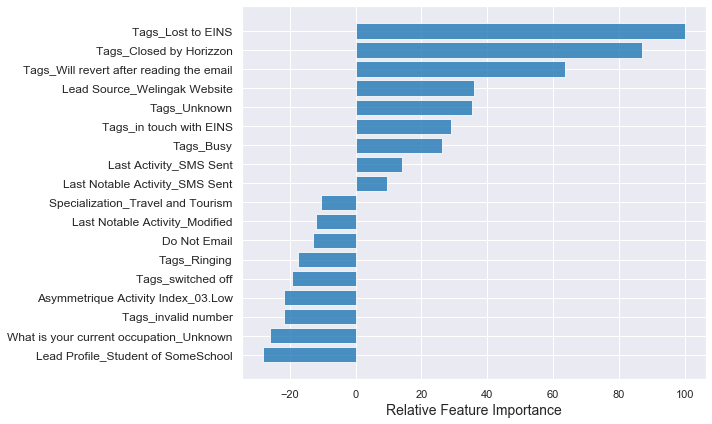

In [158]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

#### Selecting `Top 3` features which contribute most towards the probability of a lead getting converted

In [159]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
10                         Tags_Lost to EINS 100.00
9                    Tags_Closed by Horizzon  86.98
13  Tags_Will revert after reading the email  63.55

## Conclusion


#### After trying several models, we finally chose a model with the following characteristics:

 - <font color = blue>All variables have p-value < `0.05`. </font>
 - <font color = blue>All the features have low VIF values, meaning, there is `hardly any multicollinearity` among the features. This is also evident from the heat map.</font>
 - <font color = blue>The overall accuracy of `0.934` at a probability threshold of 0.56 on the test dataset is also very acceptable.</font>
    
#### Based on our model, some features are identified which contribute most to a Lead getting converted successfully.


#### The conversion probability of a lead increases with increase in values of the following features in descending order:

|Features with Positive Coefficient Values|
|-------------|
|Tags_Lost to EINS|
|Tags_Closed by Horizzon|
|Tags_Will revert after reading the email|
|Lead Source_Welingak Website|
|Tags Unknown|
|Tags_in touch with EINS|
|Tags Busy|

#### The conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|----------|
|Tags_switched off|
|Tags_Ringing|
|Tags_Invalid Number|
|What is your current occupation_Unknown|



**The model is prepared for prediction of the conversion of the leads. The probability values are generated by the model. The cut-off decided for the model is `0.56`. 
**All leads whose probability is generated above this threshhold value can be classified as Hot Lead.**